In [2]:
import json

import matplotlib.pyplot as plt

In [4]:
# Download data.json using `python scan.py | tee -a data.json`.
with open('data.json', 'rt') as f:
    lines = [x.strip() for x in f.readlines()]
objs = [json.loads(x) for x in lines]
objs = [x for x in objs if 'details' in x and x['details']]
# Some details have plates which don't match the plate
# we searched. Not sure why, but it can be fixed like so.
for obj in objs:
    obj['plate'] = obj['details']['License Plate']

In [5]:
all_plates = set([x['plate'] for x in objs])

In [6]:
print('total tickets:', len(objs))
print('unique plates:', len(all_plates))
print('total money:', sum([float(x['amount']) for x in objs]))

total tickets: 29899
unique plates: 6900
total money: 2435108.409999996


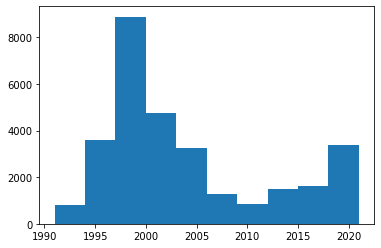

In [7]:
years = [int(x['date'].split('/')[-1]) for x in objs]
plt.hist(years)
plt.show()

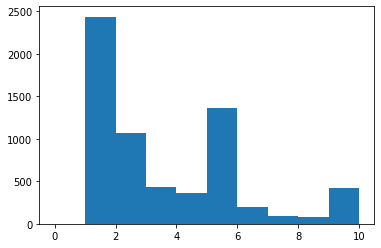

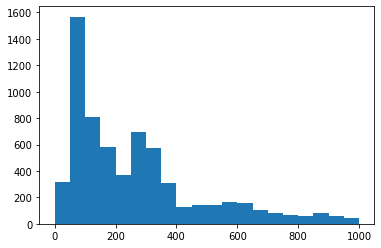

plate with max tickets: ELH3256 155


In [11]:
counts = {x: 0 for x in all_plates}
money = {x: 0 for x in all_plates}
for ticket in objs:
    counts[ticket['plate']] += 1
    money[ticket['plate']] += float(ticket['amount'])
plt.hist(counts.values(), range=(0, 10), bins=10)
plt.show()
plt.hist(money.values(), range=(0, 1000), bins=20)
plt.show()

# Find the plate with the most tickets.
max_tickets = max(counts.values())
for plate, count in counts.items():
    if count == max_tickets:
        print('plate with max tickets:', plate, max_tickets)

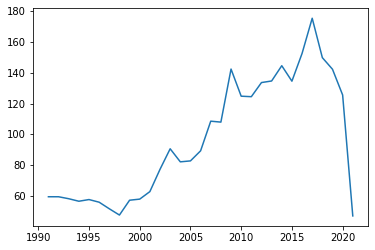

In [13]:
year_amounts = {x: [] for x in range(1991, 2022)}
for obj in objs:
    year = int(obj['date'].split('/')[-1])
    year_amounts[year].append(float(obj['amount']))
plt.plot(year_amounts.keys(), [sum(x)/len(x) for x in year_amounts.values()])
plt.show()

In [22]:
violations = {}
for obj in objs:
    violation = obj['details']['Violation']
    if violation not in violations:
        violations[violation] = 1
    else:
        violations[violation] += 1
for name, count in sorted(violations.items(), key=lambda x: x[1])[::-1]:
    print(f'{count: 5} {name}')

LHV1719
   19 METER EXPIRED
   12 PARKING PROHIBITED
   10 EXPIRED INSPECTION
    8 OVER TIME LIMIT
    5 STOPPING PROHIBITED
    4 STORAGE FEE AUCTION
    3 LOADING ZONE
    3 SIDEWALK
    2 FIRE HYDRANT
    2 CORNER CLEARANCE
    2 BUS ONLY ZONE
    2 HP RAMP BLOCKED
    2 METER EXPIRED CC
    2 DOUBLE PARKED
    1 SPEED CAMERA VIOLATION
    1 PHOTO RED LIGHT
    1 HP RESERVED SPACE
    1 TOW FEE AUCTION
    1 STOP PROHIBITED CC
    1 UNREG/ABANDONED VEH
    1 PARKING PROHBITED CC
    1 PARKING PROHBITED
    1 PASSENGR LOADNG ZONE
